In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [165]:
df = pd.read_csv('/kaggle/input/house-prices-sales-prices-prediction/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-sales-prices-prediction/test.csv')
submission_df = pd.read_csv('/kaggle/input/house-prices-sales-prices-prediction/sample_submission.csv')
df.shape

(1460, 81)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [144]:
df.isna().sum() #to check for null rows

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [145]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [146]:
df.describe().T #to find information about data

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

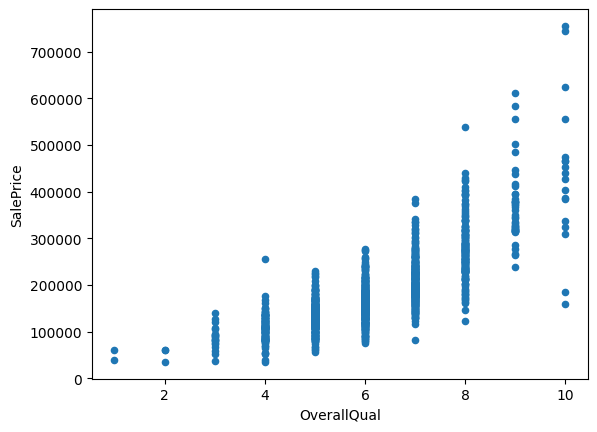

In [147]:
df.plot(kind='scatter',x = 'OverallQual' , y = 'SalePrice')

In [166]:
impute_categorical = SimpleImputer(strategy = 'most_frequent')
categorical_columns1 = df.select_dtypes(include = 'object').columns
df[categorical_columns1] = impute_categorical.fit_transform(df[categorical_columns1])
df[categorical_columns1].isna().sum()

#The main purpose of SimpleImputer is to handle missing values in your dataset
# bye3mel keda lel categorial data bas eli heya "object"


MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [167]:
# for test data
categorical_columns = test_data.select_dtypes(include = 'object').columns
test_data[categorical_columns] = impute_categorical.fit_transform(test_data[categorical_columns])
test_data[categorical_columns].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [168]:
df[categorical_columns]


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [169]:
encoder = LabelEncoder()
encoded_columns = df.select_dtypes(include = 'object').columns

#looping on each column and encode it
for col in encoded_columns:
    df[col] = encoder.fit_transform(df[col])

df[encoded_columns]    

#by7awel ay categorial data (object) l numeric data (encoded)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,0,3,3,0,4,0,5,2,...,1,1,4,4,2,2,2,2,8,4
1,3,1,0,3,3,0,2,0,24,1,...,1,1,4,4,2,2,2,2,8,4
2,3,1,0,0,3,0,4,0,5,2,...,1,1,4,4,2,2,2,2,8,4
3,3,1,0,0,3,0,0,0,6,2,...,5,2,4,4,2,2,2,2,8,0
4,3,1,0,0,3,0,2,0,15,2,...,1,1,4,4,2,2,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,0,3,3,0,4,0,8,2,...,1,1,4,4,2,2,2,2,8,4
1456,3,1,0,3,3,0,4,0,14,2,...,1,2,4,4,2,2,2,2,8,4
1457,3,1,0,3,3,0,4,0,6,2,...,1,1,4,4,2,2,0,2,8,4
1458,3,1,0,3,3,0,4,0,12,2,...,1,2,4,4,2,2,2,2,8,4


In [170]:
encoded_columns = test_data.select_dtypes(include = 'object').columns

#looping on each column and encode it
for col in encoded_columns:
    test_data[col] = encoder.fit_transform(test_data[col])

test_data[encoded_columns]  

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2,1,0,3,3,0,4,0,12,1,...,1,2,3,4,2,0,2,2,8,4
1,3,1,0,0,3,0,0,0,12,2,...,1,2,3,4,2,0,2,0,8,4
2,3,1,0,0,3,0,4,0,8,2,...,1,0,3,4,2,0,2,2,8,4
3,3,1,0,0,3,0,4,0,8,2,...,1,0,3,4,2,0,2,2,8,4
4,3,1,0,0,1,0,4,0,22,2,...,1,1,3,4,2,0,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,0,3,3,0,4,0,10,2,...,1,2,3,4,2,0,2,2,8,4
1455,4,1,0,3,3,0,4,0,10,2,...,4,2,3,4,2,0,2,2,8,0
1456,3,1,0,3,3,0,4,0,11,2,...,5,2,3,4,2,0,2,2,8,0
1457,3,1,0,3,3,0,4,0,11,2,...,1,2,3,4,2,0,2,2,8,4


In [ ]:
#find correlation using heatmap between all data on y axis and saleprice on x axis
fig , ax = plt.subplots(figsize = (10,60))
corr = df.corr()[['SalePrice']]
sns.heatmap(corr.sort_values(by = 'SalePrice' , ascending = False) , cmap = 'Blues' , annot = True , ax = ax)

<Axes: >

In [172]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['SalePrice']

# Set a threshold for low correlation
correlation_threshold = 0.36

# Find the columns with low correlation
low_correlation_features = correlation_with_target[abs(correlation_with_target) < correlation_threshold].index

low_correlation_features

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [173]:
# Drop the columns with low correlation
df_dropped = df.drop(columns=low_correlation_features)

In [174]:
test_dropped = test_data.drop(columns=low_correlation_features)
test_dropped = test_dropped.dropna()

<Axes: >

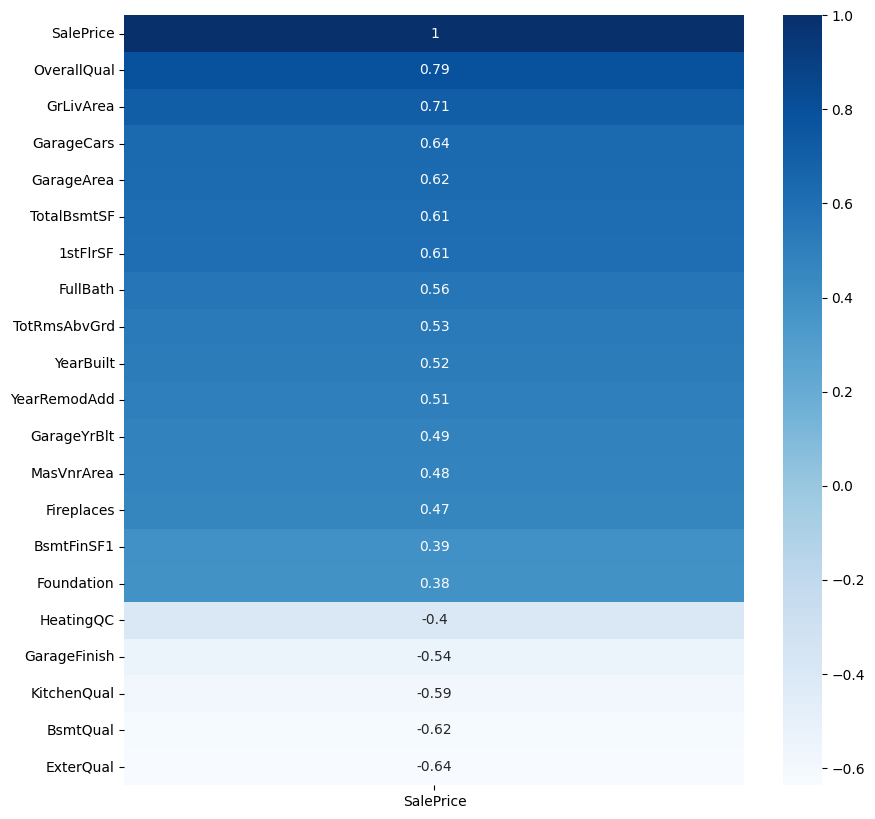

In [175]:
#find correlation using heatmap between all data on y axis and saleprice on x axis
fig , ax = plt.subplots(figsize = (10,10))
corr = df_dropped.corr()[['SalePrice']]
sns.heatmap(corr.sort_values(by = 'SalePrice' , ascending = False) , cmap = 'Blues' , annot = True , ax = ax)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

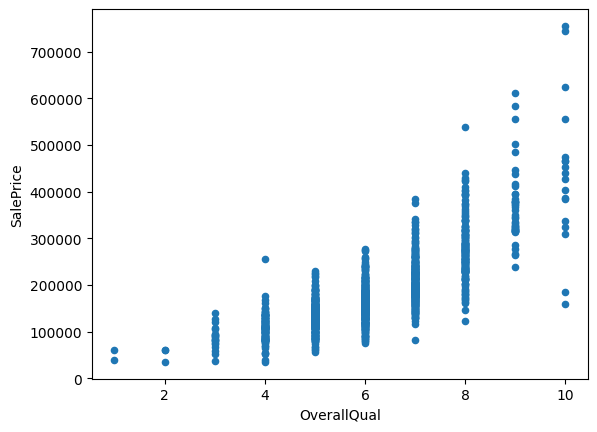

In [176]:
df.plot(kind='scatter',x = 'OverallQual' , y = 'SalePrice')

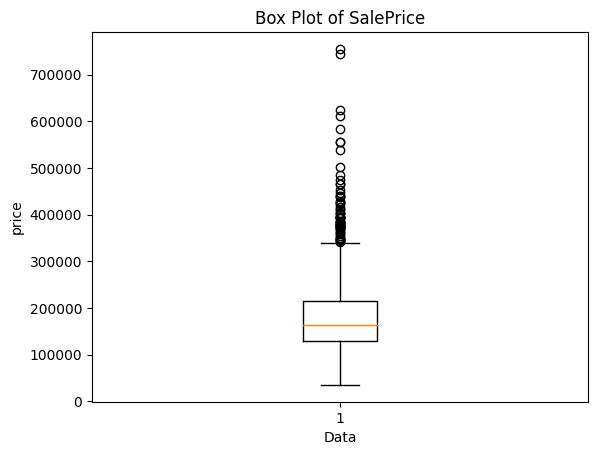

In [177]:
plt.boxplot(df['SalePrice'])
plt.title('Box Plot of SalePrice')
plt.xlabel('Data')
plt.ylabel('price')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

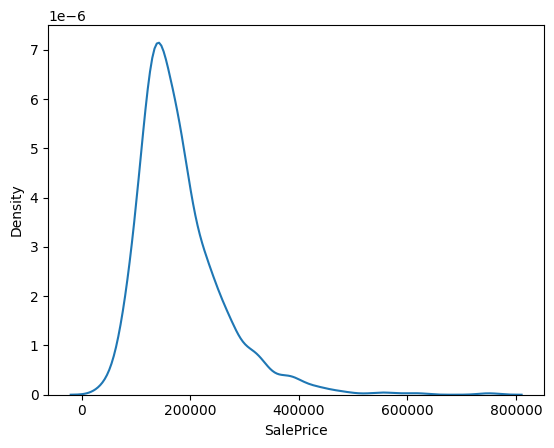

In [178]:
sns.kdeplot(df['SalePrice'])
# we conclude that it has normal distribution and is right skewed

In [179]:
Q1 = np.percentile(df_dropped['SalePrice'], 25)
Q3 = np.percentile(df_dropped['SalePrice'], 75)
IQR = Q3 - Q1

outliers = [x for x in df_dropped['SalePrice'] if x < Q1 - 1.5 * IQR or x > Q3 + 1.5 * IQR]

print(outliers)
# we conclude that there are not many outliers so we can drop them from the

[345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000, 386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426, 437154, 394432, 426000, 555000, 440000, 380000, 374000, 430000, 402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000, 402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000, 395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000, 556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500, 381000, 410000, 466500, 377500, 394617]


In [180]:
outlier_mask = (df_dropped['SalePrice'] < Q1 - 1.5 * IQR) | (df_dropped['SalePrice'] > Q3 + 1.5 * IQR)

print(outlier_mask)
df_no_outliers = df_dropped[~outlier_mask]

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool


In [181]:
# Display the resulting DataFrame

df_no_outliers = df_no_outliers.dropna()
df_no_outliers

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,...,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,2,2,2,706,856,0,...,1710,2,2,8,0,2003.0,1,2,548,208500
1,6,1976,1976,0.0,3,1,2,978,1262,0,...,1262,2,3,6,1,1976.0,1,2,460,181500
2,7,2001,2002,162.0,2,2,2,486,920,0,...,1786,2,2,6,1,2001.0,1,2,608,223500
3,7,1915,1970,0.0,3,0,3,216,756,2,...,1717,1,2,7,1,1998.0,2,3,642,140000
4,8,2000,2000,350.0,2,2,2,655,1145,0,...,2198,2,2,9,1,2000.0,1,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,3,2,2,0,953,0,...,1647,2,3,7,1,1999.0,1,2,460,175000
1456,6,1978,1988,119.0,3,1,2,790,1542,4,...,2073,2,3,7,2,1978.0,2,2,500,210000
1457,7,1941,2006,0.0,0,4,3,275,1152,0,...,2340,2,2,9,2,1941.0,1,1,252,266500
1458,5,1950,1996,0.0,3,1,3,49,1078,2,...,1078,1,2,5,0,1950.0,2,1,240,142125


### Simple linear regression

In [182]:
X_train = df_no_outliers.drop(['SalePrice'], axis=1)
y_train = df_no_outliers['SalePrice']

In [ ]:
#simple regression with the output and the feature with highest correlation
# x1 = df_no_outliers[['OverallQual']]
# y1 = df_no_outliers['SalePrice']

# print(f'x shape = {x1.shape}')
# print(f'y shape = {y1.shape}')

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [183]:
X_test = test_dropped

In [ ]:
scaler = StandardScaler()

# standardizing the features
x_train_Scaled = scaler.fit_transform(X_train)
x_test_Scaled  = scaler.fit_transform(X_test)

In [184]:
# x_train_Scaled = x_train_Scaled.dropna()

print(y_train.shape,X_train.shape, X_test.shape)

(1311,) (1311, 20) (1366, 20)


In [185]:
# loading the model
model = LinearRegression()

# training the model
model.fit(X_train, y_train)

LinearRegression()

In [186]:
predictions = model.predict(X_test)

In [187]:
predictions2 = model.predict(X_train)

In [188]:
r2_score(y_train,predictions2) # accuracy after scaling

0.7928867596222691

In [189]:
test_dropped_df = pd.DataFrame(test_dropped)

# Add an 'Id' column using the index
test_dropped_df['Id'] = test_dropped_df.index

sub = pd.DataFrame()
sub['Id'] = test_dropped_df['Id']
sub['SalePrice'] = predictions
sub.to_csv('/kaggle/working/submission.csv',index=False)
sub.shape

(1366, 2)

In [190]:
print(sub.head())

   Id      SalePrice
0   0  114838.730331
1   1  144217.437293
2   2  177356.979498
3   3  195954.975828
4   4  200238.187087


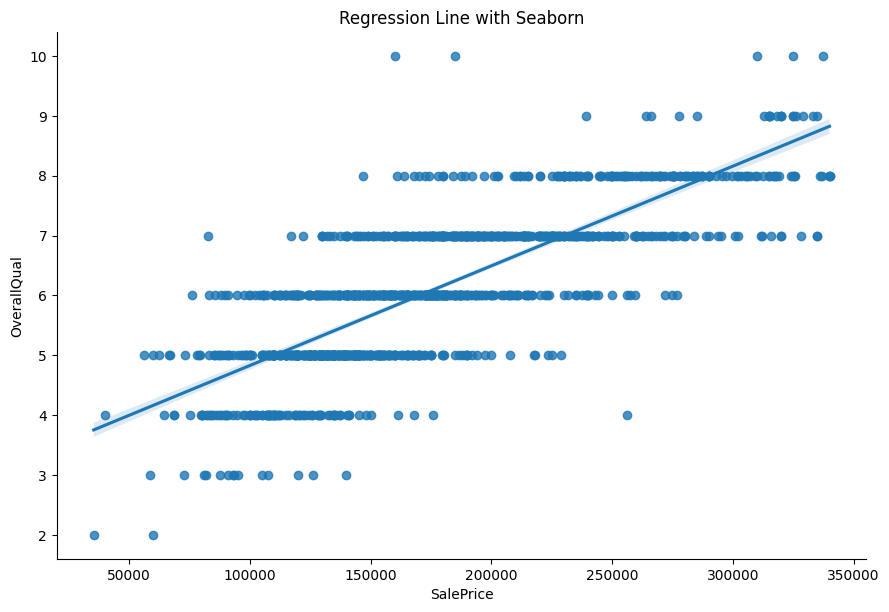

In [191]:
# Create a scatter plot with a regression line
sns.lmplot(x='SalePrice', y='OverallQual', data=df_no_outliers, aspect=1.5, height=6)

# Add title
plt.title('Regression Line with Seaborn')

# Show the plot
plt.show()

### Multiple linear regression

In [192]:
df = df_no_outliers.dropna()
x = df.drop(columns=['SalePrice'], axis=1)
y = df['SalePrice']
print(x.shape)
y.shape

(1311, 20)


(1311,)

In [193]:
#do train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1311, 20) (1048, 20) (263, 20) (1048,) (263,)


In [194]:
scaler = StandardScaler()

# standardizing the features
x_train_Scaled = scaler.fit_transform(x_train)
x_test_Scaled  = scaler.fit_transform(x_test)
x_train.describe()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,6.054389,1972.393130,1984.647901,93.950382,2.593511,1.395038,2.338740,424.659351,1037.744275,1.549618,1148.742366,1494.562023,1.556298,2.414122,6.457061,0.609733,1978.270992,1.211832,1.841603,489.922710
std,1.235382,28.715348,20.223656,151.672142,0.599933,0.722443,0.774934,434.031246,411.905530,1.752994,357.170495,476.493869,0.535893,0.741891,1.511518,0.640395,23.775876,0.807660,0.599033,174.767557
min,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,438.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,1.000000,160.000000
25%,5.000000,1956.000000,1967.000000,0.000000,2.000000,1.000000,2.000000,0.000000,799.750000,0.000000,894.000000,1141.750000,1.000000,2.000000,5.000000,0.000000,1962.000000,1.000000,1.000000,380.000000
50%,6.000000,1974.000000,1992.000000,0.000000,3.000000,1.000000,2.000000,378.500000,988.000000,0.000000,1090.000000,1458.500000,2.000000,3.000000,6.000000,1.000000,1978.000000,1.000000,2.000000,480.000000
75%,7.000000,2000.000000,2003.000000,157.000000,3.000000,2.000000,3.000000,697.000000,1258.500000,4.000000,1357.250000,1735.000000,2.000000,3.000000,7.000000,1.000000,2000.000000,2.000000,2.000000,576.000000
max,10.000000,2009.000000,2010.000000,1129.000000,3.000000,5.000000,3.000000,5644.000000,6110.000000,4.000000,4692.000000,5642.000000,3.000000,3.000000,12.000000,3.000000,2010.000000,2.000000,4.000000,1418.000000


In [195]:
num_rows_with_nan = df.isnull().any(axis=1).sum()
print(f"Number of rows with at least one NaN value: {num_rows_with_nan}")

Number of rows with at least one NaN value: 0


In [196]:
num_cols_with_nan = df.isnull().any(axis=0)

print(f"Number of columns with at least one NaN value: {num_cols_with_nan}")

Number of columns with at least one NaN value: OverallQual     False
YearBuilt       False
YearRemodAdd    False
MasVnrArea      False
ExterQual       False
Foundation      False
BsmtQual        False
BsmtFinSF1      False
TotalBsmtSF     False
HeatingQC       False
1stFlrSF        False
GrLivArea       False
FullBath        False
KitchenQual     False
TotRmsAbvGrd    False
Fireplaces      False
GarageYrBlt     False
GarageFinish    False
GarageCars      False
GarageArea      False
SalePrice       False
dtype: bool


In [197]:
# Calculate median for each column
medians = df.median()

# Fill NaNs in each column with the median of that column
df = df.fillna(medians)

num_cols_with_nan = df.isnull().any(axis=0)

print(f"Number of columns with at least one NaN value: {num_cols_with_nan}")

Number of columns with at least one NaN value: OverallQual     False
YearBuilt       False
YearRemodAdd    False
MasVnrArea      False
ExterQual       False
Foundation      False
BsmtQual        False
BsmtFinSF1      False
TotalBsmtSF     False
HeatingQC       False
1stFlrSF        False
GrLivArea       False
FullBath        False
KitchenQual     False
TotRmsAbvGrd    False
Fireplaces      False
GarageYrBlt     False
GarageFinish    False
GarageCars      False
GarageArea      False
SalePrice       False
dtype: bool


In [198]:
# loading the model
model = LinearRegression()

# training the model
model.fit(x_train_Scaled, y_train)

LinearRegression()

In [199]:
list_of_features = list(df.columns)
type(list_of_features)
list_of_features.pop()
list_of_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea']

In [200]:
list_of_coef_features = list(model.coef_)
list_of_coef_features

[17642.133548476293,
 7603.6344091637075,
 5095.142702230451,
 -690.1278846526957,
 -1176.7160800858019,
 756.3385553377256,
 -2023.6531082364477,
 3054.9994677204286,
 1807.3890775887062,
 -3015.609863761257,
 512.824343345642,
 11632.330031710726,
 -166.93874142730223,
 -4641.75556876317,
 3286.3303458679948,
 6259.2020541331985,
 -4150.228122795104,
 -3326.8253495366644,
 4066.128078364614,
 4658.0555388137]

In [201]:
model.intercept_

174014.51717557252

In [202]:
df = pd.DataFrame({

'Feature_Names' : list_of_features , 
'coef' : list_of_coef_features

})

df

,Feature_Names,coef
0,OverallQual,17642.133548
1,YearBuilt,7603.634409
2,YearRemodAdd,5095.142702
3,MasVnrArea,-690.127885
4,ExterQual,-1176.716080
5,Foundation,756.338555
6,BsmtQual,-2023.653108
7,BsmtFinSF1,3054.999468
8,TotalBsmtSF,1807.389078
9,HeatingQC,-3015.609864


In [203]:
Y_pred = model.predict(x_test_Scaled)
r2_score(y_test,Y_pred)

0.8396763950979578

### Lasso regression

In [204]:
ridge_model = Ridge()

ridge_model.fit(x_train_Scaled, y_train)

Ridge()

In [205]:
y_pred_ridge = ridge_model.predict(x_test_Scaled)
mean_absolute_error(y_test,y_pred_ridge)

19078.361640661176

In [206]:
mean_squared_error(y_test,y_pred_ridge)

611535065.3655255

In [207]:
r2_score(y_test,y_pred_ridge)

0.839676797774163

### Ridge regression

In [208]:
from sklearn.model_selection import GridSearchCV
param_grid = {

    'alpha' : [0.1,0.001,0.0001,0.00001,1,100]
}

ridge_cv = GridSearchCV(ridge_model, param_grid , cv=3 , n_jobs=-1)

ridge_cv.fit(x_train_Scaled, y_train)

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.001, 0.0001, 1e-05, 1, 100]})

In [209]:
y_pred_ridge_1 = ridge_cv.predict(x_test_Scaled)

r2_score(y_test, y_pred_ridge_1)

0.8376352088281245